In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from plotly.subplots import make_subplots

In [3]:
df = pd.read_csv("/content/weather_data_preprocessed.csv")

In [4]:
df.head(20)

,date,rain_or_not,pressure,avg_temperature,humidity,avg_wind_speed,cloud_cover
0,2023-01-01,1,992.965681,23.745401,46.140905,7.845981,20.851051
1,2023-01-02,1,1037.273025,30.030503,59.876587,5.382457,93.059521
2,2023-01-03,1,1034.193357,28.365224,51.464618,13.158008,11.636640
3,2023-01-04,1,968.610142,27.550929,53.103799,5.886677,81.744971
4,2023-01-05,1,1030.264331,23.639303,57.826186,12.248992,38.062329
5,2023-01-06,1,995.818689,24.148136,49.703435,6.587024,87.797432
6,2023-01-07,1,998.296887,23.671006,63.997418,5.654166,86.805669
7,2023-01-08,1,963.347997,32.245441,67.083073,6.940197,80.592540
8,2023-01-09,1,958.060151,30.078517,64.088581,4.520668,79.003044
9,2023-01-10,1,1022.793931,31.620631,71.876470,11.214141,30.467914


In [13]:
features = ['pressure', 'avg_temperature', 'humidity', 'avg_wind_speed', 'cloud_cover']

# Create a figure with subplots for each feature
fig = make_subplots(rows=5, cols=1, shared_xaxes=True, vertical_spacing=0.06, subplot_titles=features)

for i, feature in enumerate(features, 1):
    fig.add_trace(
        px.line(df, x='date', y=feature, labels={'value': feature, 'date': 'Date'}).data[0],
        row=i, col=1
    )
fig.update_layout(
    title_text='Daily Weather Measurements (2023/01-2023/10)',
    xaxis_title='Date',
    yaxis_title='Value',
    template='plotly_white'
)

fig.update_xaxes(matches='x')

for i in range(1, 6):
    fig.update_yaxes(row=i, col=1, title_text=features[i-1], showticklabels=True)

fig.update_layout(height=1000)
fig.show()

In [18]:
features = ['pressure', 'avg_temperature', 'humidity', 'avg_wind_speed', 'cloud_cover']

fig_matrix = px.scatter_matrix(df,
                               dimensions=features[:5],

                               title='Pairplot of Weather Data',
                               labels={'cloud_cover': 'Cloud Cover'},
                               height=1000, width=1000)

fig_matrix.show()


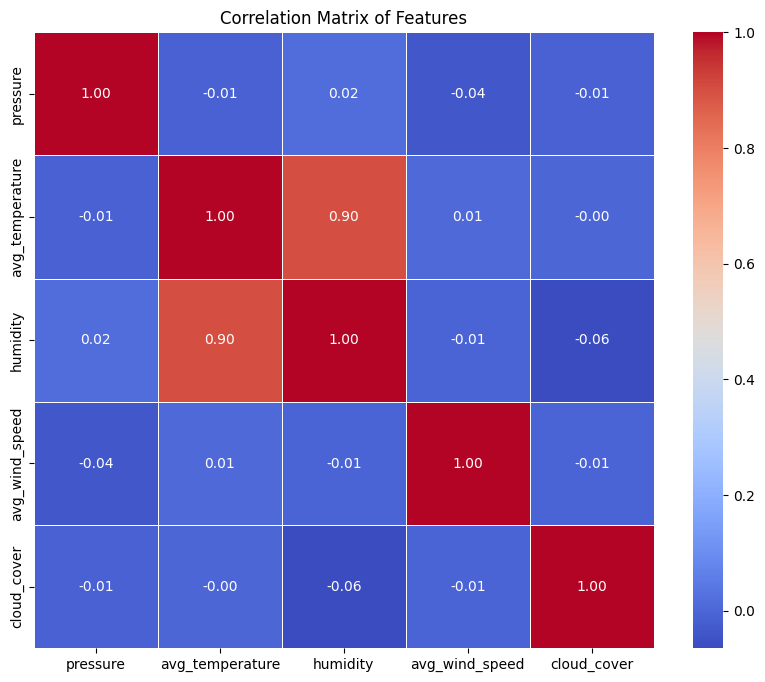

In [19]:

features = ['pressure', 'avg_temperature', 'humidity', 'avg_wind_speed', 'cloud_cover']

# Calculate the correlation matrix
corr = df[features].corr()

# Plot the correlation matrix using a heatmap
plt.figure(figsize=(10, 8))  # Set the figure size as needed
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix of Features')
plt.show()

<Axes: xlabel='avg_wind_speed', ylabel='Count'>

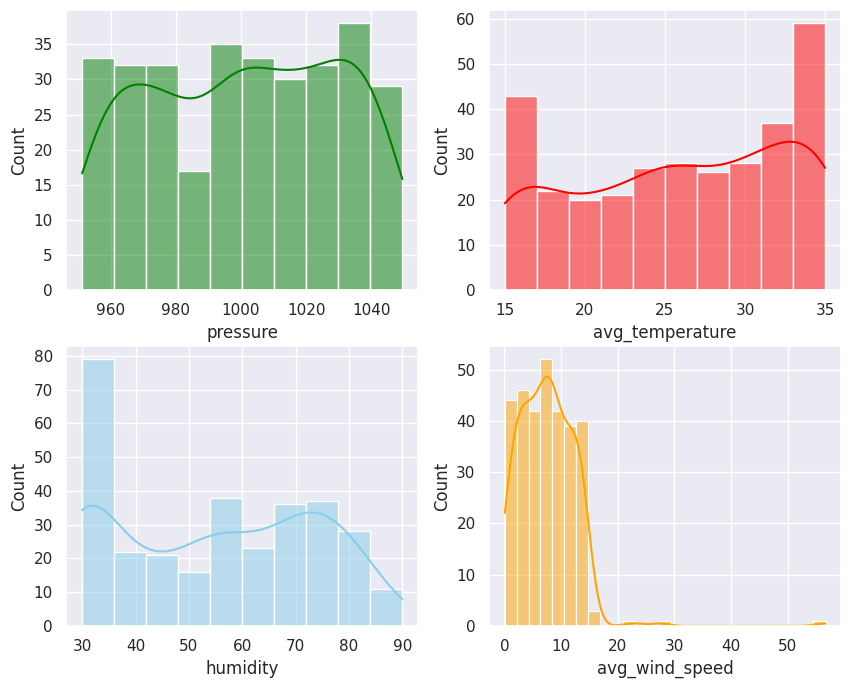

In [20]:
sns.set(style="darkgrid")
fig,axs=plt.subplots(2,2,figsize=(10,8))
sns.histplot(data=df,x="pressure",kde=True,ax=axs[0,0],color='green')
sns.histplot(data=df,x="avg_temperature",kde=True,ax=axs[0,1],color='red')
sns.histplot(data=df,x="humidity",kde=True,ax=axs[1,0],color='skyblue')
sns.histplot(data=df,x="avg_wind_speed",kde=True,ax=axs[1,1],color='orange')

/usr/local/lib/python3.11/dist-packages/seaborn/categorical.py:2761: UserWarning:

catplot is a figure-level function and does not accept target axes. You may wish to try stripplot

<ipython-input-26-56bbd6a863f7>:4: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


/usr/local/lib/python3.11/dist-packages/seaborn/categorical.py:2761: UserWarning:

catplot is a figure-level function and does not accept target axes. You may wish to try stripplot

<ipython-input-26-56bbd6a863f7>:4: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


/usr/local/lib/python3.11/dist-packages/seaborn/categorical.py:2761: UserWarning:

catplot is a figure-level function and does not accept target axes. You may wish to try stripplot

<ipython-input

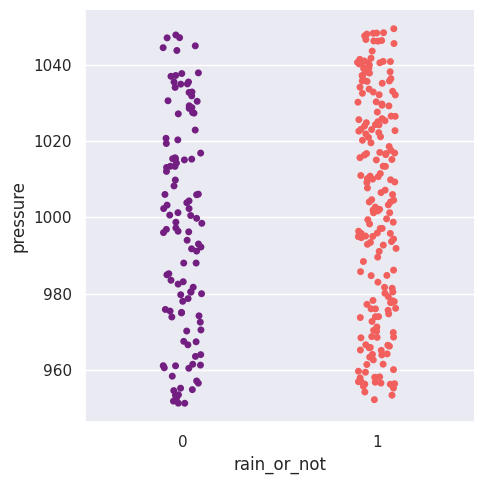

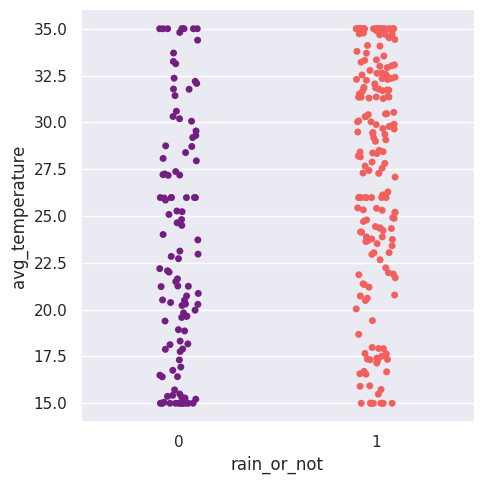

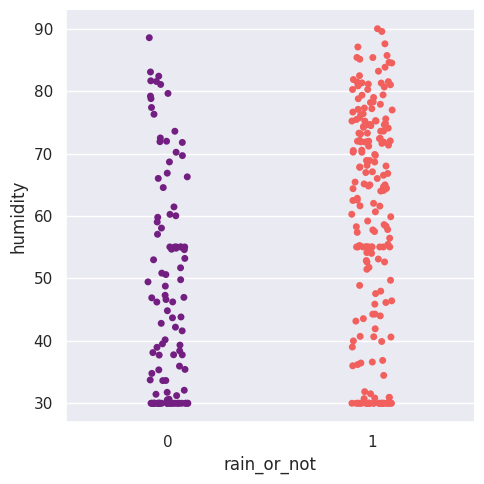

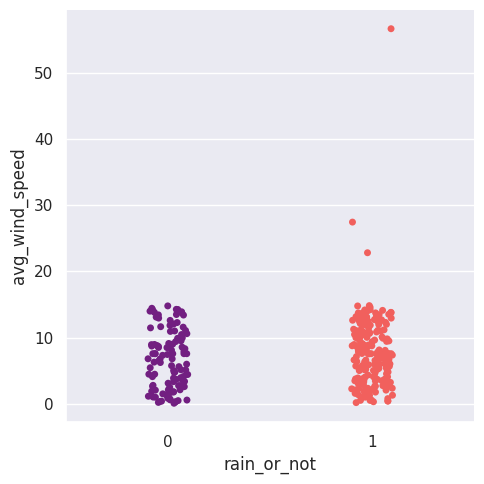

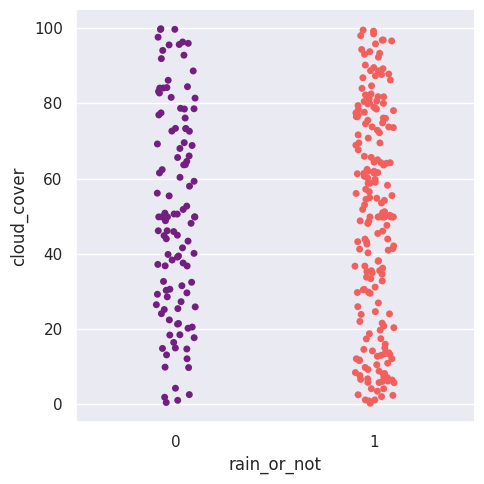

In [26]:
features = df.columns[-5:].tolist()  # Get the last 5 columns as features

for i, feature in enumerate(features):
    sns.catplot(x='rain_or_not', y=feature, data=df, palette="magma", ax=axes[i])
    axes[i].set_title(f'{feature} vs Rain/No Rain')

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()